In [2]:
import sympy as sp
def dn_sin(n):
    if n%4 == 0:
        return sp.sin(0)
    elif n%4 == 1:
        return sp.cos(0)
    elif n%4 == 2:
        return sp.sin(0)*(-1)
    else:
        return sp.cos(0)*(-1)

In [64]:
def fact(n):
    f = 1
    for i in range(1,n+1):
        f = f * i
    return f


def taylor_sin(x, n):
    sum_t = 0
    for i in range(0,n+1):
        sum_t = sum_t + (dn_sin(i)*(x**i))/fact(i)
    return sum_t

taylor_sin(3.2, 30)

-0.0583741434275809

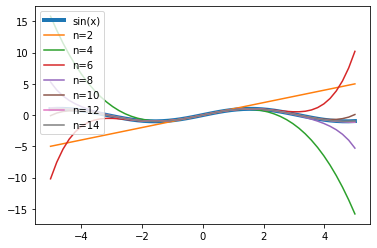

In [101]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(-5,5)
y = np.zeros(50)
for i in range(0,50):
    y[i] = sp.sin(x[i])
plt.plot(x,y,linewidth = 4)
for i in range(2,16,2):
    for j in range(0,50):
        y[j] = taylor_sin(x[j], i)
    plt.plot(x,y)
plt.legend(['sin(x)','n=2','n=4','n=6','n=8','n=10','n=12','n=14'])

In [102]:
from numpy import linalg as la
def measure_diff(ary1, ary2):
    a_diff = np.subtract(ary1,ary2)
    n_diff = la.norm(a_diff)
    return n_diff


In [113]:
import math
x = np.linspace(0,math.pi/4)
y_sin = np.zeros(50)
y_tay = np.zeros(50)
for i in range(0,50):
    y_sin[i] = sp.sin(x[i])
for i in range(2,16,2):
    for j in range(0,50):
        y_tay[j] = taylor_sin(x[j], i)
    d = measure_diff(y_sin,y_tay)
    if d < 1e-2:
        print('The truncation order needed is n = '+ str(i))
        break

The truncation order needed is n = 4


In [142]:
def escape(cx, cy, dist, itrs, x0 = 0, y0 = 0):
    z = complex(x0,y0)
    for i in range(itrs):
        zx = z.real
        zy = z.imag
        z = z*z + complex(cx,cy)
        zx = z.real
        zy = z.imag
        if la.norm([zx,zy]) > dist:
            break
    return i


escape(0.4,0.5,2.5,256)

6

In [169]:
def mandelbrot(cx,cy,dist,itrs):
    lex = len(cx)
    ley = len(cy)
    ary = np.zeros((lex,ley))
    for i in range(ley):
        for j in range(lex):
            ary[i,j] = escape(cx[j],cy[i],2.5,256)
    return ary



In [170]:
import time
cx = np.linspace(-2.5,2.5,512)
cy = np.linspace(-2.5,2.5,512)
lex = len(cx)
ley = len(cy)
start = time.time()
bo_ary = mandelbrot(cx,cy,2.5,256)
end = time.time()
for i in range(lex):
    for j in range(ley):
        if bo_ary[i,j] < 255:
            bo_ary[i,j] = 1
        else:
            bo_ary[i,j] = 0
exe = end - start
print('The execution time is '+ str(exe) + ' seconds')


The execution time is 88.1625587940216 seconds


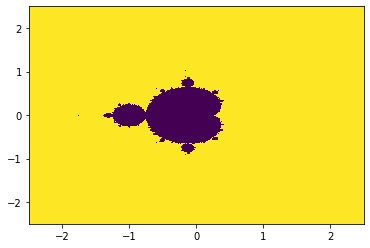

In [175]:
plt.pcolormesh(cx,cy,bo_ary)